In [1]:
#Initialize environment

import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Read in data file

crime = pd.read_csv('DenverCrime_2001_2013.csv')
crime
#, index_col="Type"

,Type,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Murders,45,51,63,87,59,51,47,40,39,22,34,39,40
1,Rapes,317,324,304,243,328,342,296,282,343,367,396,376,514
2,Robberies,1250,1193,1421,1442,1432,1280,1045,951,946,926,1143,1165,1132
3,Assaults,1462,1539,1743,2718,2673,2652,2164,2088,2165,1976,2135,2291,2401
4,Burglaries,5642,6117,7097,7322,7360,6543,5694,5173,4763,4501,4868,5129,4918
5,Thefts,14621,15467,14839,15590,18518,13376,11594,10547,12628,12944,14040,14544,15306
6,Auto thefts,6935,7441,7128,7538,8024,6347,5121,3596,3488,3226,3587,3670,3487
7,Arson,345,283,228,166,256,198,178,147,136,128,95,97,96


In [3]:
x = crime.Type
y = crime.sum(axis=1)

/var/folders/f3/816lhmpj4qdfrvq5v0qz6xbm0000gp/T/ipykernel_27798/440283916.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = crime.sum(axis=1)


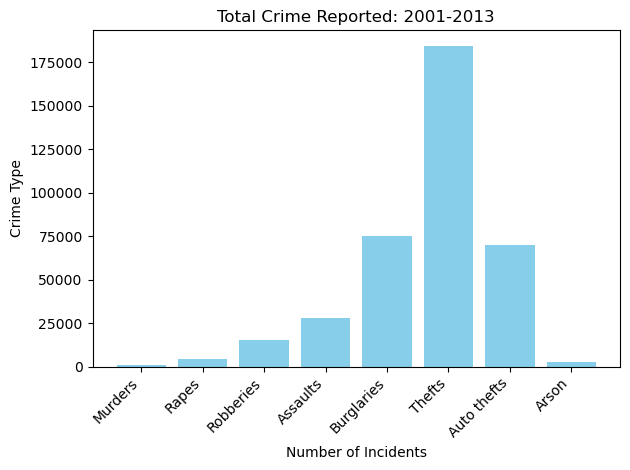

In [4]:
# Plotting the data
plt.bar(x, y, color='skyblue')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.title('Total Crime Reported: 2001-2013')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.savefig('Total Crime Types.png')

plt.show()

In [5]:
crime.set_index('Type', inplace=True)
yearly_totals = crime.sum()

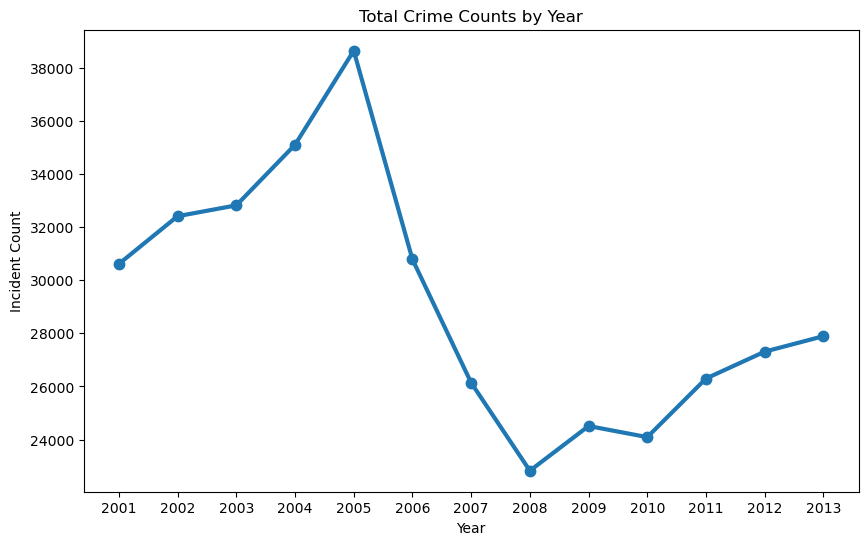

In [6]:
# Create Line Plot

plt.figure(figsize=(10,6))

plt.plot(yearly_totals, linewidth=3, marker='.', markersize=15)

plt.title('Total Crime Counts by Year')
plt.xlabel('Year')
plt.ylabel('Incident Count')

plt.savefig('Total Crime Counts By Year.png')

plt.show()

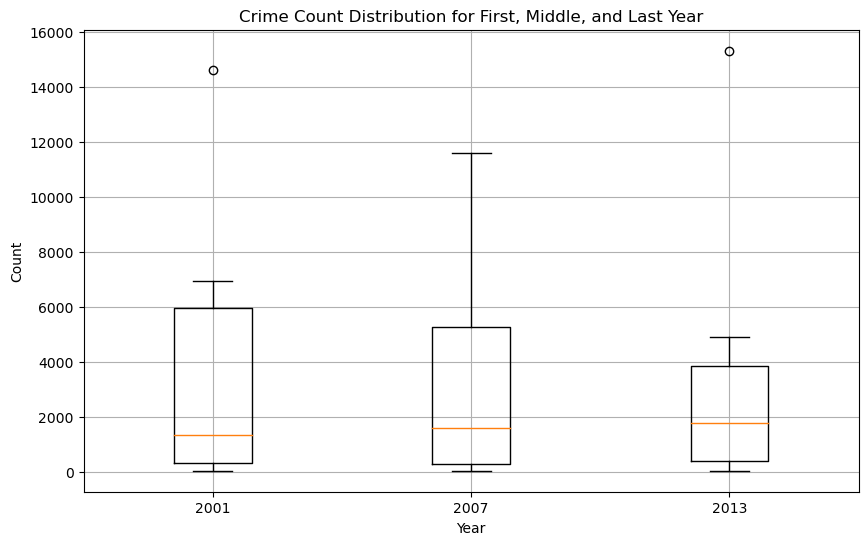

In [7]:
first_year = crime.columns[0]
middle_year = crime.columns[len(crime.columns) // 2]
last_year = crime.columns[-1]

# Plotting
plt.figure(figsize=(10, 6))

# Creating boxplot for the first, middle, and last years
plt.boxplot([crime[first_year], crime[middle_year], crime[last_year]], labels=[first_year, middle_year, last_year])

plt.title('Crime Count Distribution for First, Middle, and Last Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)

plt.savefig('Crime Count Distribution.png')

plt.show()

In [8]:
crime2 = pd.read_csv('DenverCrime_2001_2013.csv')
crime2

,Type,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Murders,45,51,63,87,59,51,47,40,39,22,34,39,40
1,Rapes,317,324,304,243,328,342,296,282,343,367,396,376,514
2,Robberies,1250,1193,1421,1442,1432,1280,1045,951,946,926,1143,1165,1132
3,Assaults,1462,1539,1743,2718,2673,2652,2164,2088,2165,1976,2135,2291,2401
4,Burglaries,5642,6117,7097,7322,7360,6543,5694,5173,4763,4501,4868,5129,4918
5,Thefts,14621,15467,14839,15590,18518,13376,11594,10547,12628,12944,14040,14544,15306
6,Auto thefts,6935,7441,7128,7538,8024,6347,5121,3596,3488,3226,3587,3670,3487
7,Arson,345,283,228,166,256,198,178,147,136,128,95,97,96


In [ ]:
# Set 'Type' column as the index
crime2.set_index('Type', inplace=True)

# Transpose the DataFrame
data_transposed = crime2.transpose()

# Create subplots for each year
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each year
for i, (year, ax) in enumerate(zip(data_transposed.index, axes)):
    # Sort the crime types for the current year and get the top 3
    top_3_crimes = data_transposed.loc[year].sort_values(ascending=False).head(3)
    
    # Plot the top 3 crime types for the current year
    top_3_crimes.plot(kind='bar', ax=ax, color=['skyblue', 'orange', 'green'])
    ax.set_title(f'Top 3 Crime Types - {year}')
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('Count')
    ax.set_xticklabels(top_3_crimes.index, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

plt.savefig('Top 3 Crime Types By Year.png')

plt.show()